### Section 1: Create a music KB about an artist ('Adele' for instance)

#### Get list of json files in s3 folder: https://s3.console.aws.amazon.com/s3/buckets/ag-aws-ml-sagemaker-challenge/AWS-ML-Challenge/data/music/Adele/?region=us-west-2&tab=overview

#### Get all files in folder

In [168]:
import json
import os

In [169]:
path = 's3://ag-aws-ml-sagemaker-challenge/AWS-ML-Challenge/data/music/Adele/'

In [170]:
filelist = []
my_bucket = s3.Bucket('ag-aws-ml-sagemaker-challenge')
for my_bucket_object in my_bucket.objects.all():
    if('json' in my_bucket_object.key and 'AboutAdele' not in my_bucket_object.key and 'export' not in my_bucket_object.key):
        filelist.append(my_bucket_object.key)

In [171]:
filelist

['AWS-ML-Challenge/data/music/Adele/1de93a63-3a9f-443a-ba8a-a43b5fe0121e.json',
 'AWS-ML-Challenge/data/music/Adele/3037bd18-0079-4e4b-9ce1-758689e210d8.json',
 'AWS-ML-Challenge/data/music/Adele/3ae3fa20-d295-467c-b59f-969376a28470.json',
 'AWS-ML-Challenge/data/music/Adele/5fee3020-513b-48c2-b1f7-4681b01db0c6.json',
 'AWS-ML-Challenge/data/music/Adele/7dafc8b7-8d46-49b7-bc48-558b1fd181e9.json',
 'AWS-ML-Challenge/data/music/Adele/80eee8dd-55e4-47ef-8246-f17ffd17c983.json',
 'AWS-ML-Challenge/data/music/Adele/9b64cf5d-1f4a-45b5-a84a-5109a88f178f.json',
 'AWS-ML-Challenge/data/music/Adele/9e082466-2390-40d1-891e-4803531f43fd.json',
 'AWS-ML-Challenge/data/music/Adele/9f41f18b-23b2-4052-af25-0664dbfc9085.json',
 'AWS-ML-Challenge/data/music/Adele/aca2f168-fec7-459e-a91e-3f5cd504189b.json',
 'AWS-ML-Challenge/data/music/Adele/b0335a95-8a12-4c71-8149-5054ec847d04.json',
 'AWS-ML-Challenge/data/music/Adele/c790898c-8e86-470c-88de-3d2c7560db10.json',
 'AWS-ML-Challenge/data/music/Adele/d9fa

### -----------------------------------------------------------------------------------
### Reference: Above files were created based on this paper: 

### Sergio Oramas, Luis Espinosa-Anke, Mohamed Sordo, Horacio Saggion, and Xavier Serra. 2016. ELMD : An Automatically Generated Entity Linking Gold Standard Dataset in the Music Domain. In In Proceedings of the 10th International Conference on Language Resources and Evaluation, LREC 2016.

### https://repositori.upf.edu/bitstream/handle/10230/27835/oramas_lrec16_elmd.pdf?sequence=1&isAllowed=y
### -----------------------------------------------------------------------------------

#### Initialize data structures

In [172]:
musicDB = {}
musicDB_final = {}
musicDB_text = {}
musicDB_text_final = {}
musicDB_text_list = []

#### Create a dictionary containing all text. Create another dictionary that contains all artists, albums associated with a certain artist.

In [173]:
import ast
index = -1
for file in filelist:
    index += 1
    obj = s3.Object('ag-aws-ml-sagemaker-challenge', file)
    data2 = obj.get()['Body'].read()
    data1 = data2.decode('utf-8')
    data = ast.literal_eval(data1)
    for i in range(0,len(data)):
        musicDB_text[i] = data[i]['text']
        musicDB_text_list.append(data[i]['text'])
        if(len(data[i]['entities']) > 0):
            musicDB_tmp = {}
            for j in range(0,len(data[i]['entities'])):
                musicDB_tmp[j] = {'category':data[i]['entities'][j]['category'],
                                  'label':data[i]['entities'][j]['label'],
                                  'lastfm_url':data[i]['entities'][j]['lastfm_url']}

            musicDB[i] = musicDB_tmp

    musicDB_final[index] = musicDB
    musicDB_text_final[index] = musicDB_text
    musicDB = {}
    musicDB_text = {}

In [174]:
musicDB_text_list

['Adele Laurie Blue Adkins , -LRB- born 5 May 1988 -RRB- , is a Grammy Award-Winning English singer-songwriter from Enfield , North London .',
 'Her debut album , 19 , was released in January 2008 and entered the UK album chart at # 1 .',
 'The album has since received four-times Platinum certification in the UK and has sold 5,500,000 copies worldwide .',
 'The album included the hugely popular song Chasing Pavements .',
 '19 earned Adele two Grammy Awards in February 2009 for Best New Artist and Best Female Pop Vocal Performance .',
 'Her second album , 21 , was released on January 24th 2011 in the UK and propelled Adele to unprecedented mega-stardom .',
 'In just eleven months , 21 received fourteen-times Platinum certification in the UK for shipments in excess of 4,500,000 copies , and has sold a further 6,200,000 copies in the US denoting sextuple-Platinum status .',
 'As of January 2012 , 21 has sold an estimated seventeen million copies worldwide .',
 'The album has produced thre

In [107]:
musicDB_text_final

{0: {0: 'Adele Laurie Blue Adkins , -LRB- born 5 May 1988 -RRB- , is a Grammy Award-Winning English singer-songwriter from Enfield , North London .',
  1: 'Her debut album , 19 , was released in January 2008 and entered the UK album chart at # 1 .',
  2: 'The album has since received four-times Platinum certification in the UK and has sold 5,500,000 copies worldwide .',
  3: 'The album included the hugely popular song Chasing Pavements .',
  4: '19 earned Adele two Grammy Awards in February 2009 for Best New Artist and Best Female Pop Vocal Performance .',
  5: 'Her second album , 21 , was released on January 24th 2011 in the UK and propelled Adele to unprecedented mega-stardom .',
  6: 'In just eleven months , 21 received fourteen-times Platinum certification in the UK for shipments in excess of 4,500,000 copies , and has sold a further 6,200,000 copies in the US denoting sextuple-Platinum status .',
  7: 'As of January 2012 , 21 has sold an estimated seventeen million copies worldwid

In [175]:
musicDB_final

{0: {0: {0: {'category': 'Artist',
    'label': 'Adele',
    'lastfm_url': 'http://www.last.fm/music/Adele'}},
  1: {0: {'category': 'Album',
    'label': '19',
    'lastfm_url': 'http://www.last.fm/music/Adele/19'}},
  3: {0: {'category': 'Track',
    'label': 'Chasing Pavements',
    'lastfm_url': 'http://www.last.fm/music/Adele/_/Chasing+Pavements'}},
  4: {0: {'category': 'Artist',
    'label': 'Adele',
    'lastfm_url': 'http://www.last.fm/music/Adele'}},
  5: {0: {'category': 'Album',
    'label': '21',
    'lastfm_url': 'http://www.last.fm/music/Adele/21'},
   1: {'category': 'Artist',
    'label': 'Adele',
    'lastfm_url': 'http://www.last.fm/music/Adele'}},
  8: {0: {'category': 'Track',
    'label': 'Rolling in the Deep',
    'lastfm_url': 'http://www.last.fm/music/Adele/_/Rolling+in+the+Deep'},
   1: {'category': 'Track',
    'label': 'Someone Like You',
    'lastfm_url': 'http://www.last.fm/music/Adele/_/Someone+Like+You'},
   2: {'category': 'Track',
    'label': 'Set Fir

#### Split list into a sub-list such that there are 512 words or less

In [176]:
word_count_max = 512
word_count = 0
init_ptr = 0
end_ptr = 0
musicDB_text_dict = {}
index = 0
for i in range(0,len(musicDB_text_list)):
    word_count += len(musicDB_text_list[i].split())
    if(word_count > word_count_max):
        musicDB_text_dict[index] = musicDB_text_list[init_ptr:end_ptr]
        index += 1
        init_ptr = end_ptr
        word_count = len(musicDB_text_list[i].split())
    else:
        end_ptr = i
        if(end_ptr < 1):
            init_ptr = 0
            
    musicDB_text_dict[index] = musicDB_text_list[init_ptr:end_ptr+1]

In [177]:
musicDB_text_dict

{0: ['Adele Laurie Blue Adkins , -LRB- born 5 May 1988 -RRB- , is a Grammy Award-Winning English singer-songwriter from Enfield , North London .',
  'Her debut album , 19 , was released in January 2008 and entered the UK album chart at # 1 .',
  'The album has since received four-times Platinum certification in the UK and has sold 5,500,000 copies worldwide .',
  'The album included the hugely popular song Chasing Pavements .',
  '19 earned Adele two Grammy Awards in February 2009 for Best New Artist and Best Female Pop Vocal Performance .',
  'Her second album , 21 , was released on January 24th 2011 in the UK and propelled Adele to unprecedented mega-stardom .',
  'In just eleven months , 21 received fourteen-times Platinum certification in the UK for shipments in excess of 4,500,000 copies , and has sold a further 6,200,000 copies in the US denoting sextuple-Platinum status .',
  'As of January 2012 , 21 has sold an estimated seventeen million copies worldwide .',
  'The album has p

#### Write contents to a text file

In [138]:
for k,v in musicDB_text_dict.items():
    str1 = 'Adele' + str(k) + '.json'
    s3 = boto3.resource('s3')
    obj = s3.Object('ag-aws-ml-sagemaker-challenge', 'AWS-ML-Challenge/data/music/Adele/AboutAdele/'+str1)
    obj.put(v)

<class 'list'>
['Adele Laurie Blue Adkins , -LRB- born 5 May 1988 -RRB- , is a Grammy Award-Winning English singer-songwriter from Enfield , North London .', 'Adele Laurie Blue Adkins , -LRB- born 5 May 1988 -RRB- , is a Grammy Award-Winning English singer-songwriter from Enfield , North London .', 'Her debut album , 19 , was released in January 2008 and entered the UK album chart at # 1 .', 'The album has since received four-times Platinum certification in the UK and has sold 5,500,000 copies worldwide .', 'The album included the hugely popular song Chasing Pavements .', '19 earned Adele two Grammy Awards in February 2009 for Best New Artist and Best Female Pop Vocal Performance .', 'Her second album , 21 , was released on January 24th 2011 in the UK and propelled Adele to unprecedented mega-stardom .', 'In just eleven months , 21 received fourteen-times Platinum certification in the UK for shipments in excess of 4,500,000 copies , and has sold a further 6,200,000 copies in the US den

#### Create a music dictionary for Adele, with artists who have collaborated and songs sung be her.

In [178]:
artist_dict = {}
artist_name = 'Adele'
artist_artist_dict = {}
artist_albumLabel_dict = {}
artist_trackLabel_dict = {}
artist_label_dict = {}

for k1,v1 in musicDB_final.items():
    for k2,v2 in v1.items():
        if(len(v2) > 1):
            for i in range(0,len(v2)):
                if(v2[i]['category'] == 'Artist' 
                   and artist_name.lower() not in v2[i]['label'].lower()
                   and v2[i]['label'] not in artist_artist_dict):
                    artist_artist_dict[v2[i]['label']] = v2[i]['lastfm_url']
                if(v2[i]['category'] == 'Album'
                   and v2[i]['label'] not in artist_albumLabel_dict):
                    artist_albumLabel_dict[v2[i]['label']] = v2[i]['lastfm_url']
                if(v2[i]['category'] == 'Track' 
                   and v2[i]['label'] not in artist_trackLabel_dict):
                    artist_trackLabel_dict[v2[i]['label']] = v2[i]['lastfm_url']
                if(v2[i]['category'] == 'Label'
                   and v2[i]['label'] not in artist_label_dict):
                    artist_label_dict[v2[i]['label']] = v2[i]['lastfm_url']
                
                
artist_dict[artist_name] = {'Artist,Singer':artist_artist_dict,
                            'Album,Music,Song':artist_albumLabel_dict,
                            'Track':artist_trackLabel_dict,
                            'Label':artist_label_dict}

In [179]:
artist_dict

{'Adele': {'Artist,Singer': {'Leona Lewis': 'http://www.last.fm/music/Leona+Lewis',
   'Semisonic': 'http://www.last.fm/music/Semisonic',
   'Dan Wilson': 'http://www.last.fm/music/Dan+Wilson',
   'John Munson': 'http://www.last.fm/music/John+Munson',
   'Jacob Slichter': 'http://www.last.fm/music/Jacob+Slichter',
   'Trip Shakespeare': 'http://www.last.fm/music/Trip+Shakespeare',
   'Wings': 'http://www.last.fm/music/Wings',
   'Paul McCartney': 'http://www.last.fm/music/Paul+McCartney',
   'Fred Astaire': 'http://www.last.fm/music/Fred+Astaire',
   'Gene Kelly': 'http://www.last.fm/music/Gene+Kelly',
   'Ginger Rogers': 'http://www.last.fm/music/Ginger+Rogers',
   'Cole Porter': 'http://www.last.fm/music/Cole+Porter',
   'Irving Berlin': 'http://www.last.fm/music/Irving+Berlin',
   'Jerome Kern': 'http://www.last.fm/music/Jerome+Kern',
   'Johnny Mercer': 'http://www.last.fm/music/Johnny+Mercer',
   'George and Ira Gershwin': 'http://www.last.fm/music/George+and+Ira+Gershwin',
   'Fl

### =============================================================

### Section 2: Make use of model on text created as part of above process

### Importing libraries for runtime

#### Delete models, endpoints and endpoint configurations before starting

In [180]:
import pandas as pd
import boto3
import re

### Input Format
Input file from sage_maker should be of the form .txt and with 'utf-8' encoding. Ensure Content-Type is 'text/plain'

In [181]:
file1 = open(".//data//Adele//AboutAdele//Adele0.json","r+")
print(file1.read())

["Adele Laurie Blue Adkins , -LRB- born 5 May 1988 -RRB- , is a Grammy Award-Winning English singer-songwriter from Enfield , North London .", "Her debut album , 19 , was released in January 2008 and entered the UK album chart at # 1 .", "The album has since received four-times Platinum certification in the UK and has sold 5,500,000 copies worldwide .", "The album included the hugely popular song Chasing Pavements .", "19 earned Adele two Grammy Awards in February 2009 for Best New Artist and Best Female Pop Vocal Performance .", "Her second album , 21 , was released on January 24th 2011 in the UK and propelled Adele to unprecedented mega-stardom .", "In just eleven months , 21 received fourteen-times Platinum certification in the UK for shipments in excess of 4,500,000 copies , and has sold a further 6,200,000 copies in the US denoting sextuple-Platinum status .", "As of January 2012 , 21 has sold an estimated seventeen million copies worldwide .", "The album has produced three global

## Model

### De-Serializing model

The serialzed Pickle file containing the trained model must be loaded for extracting key-phrases from the input text.

The model is de-serialized to a Python object.

<b> Note: 
    Ensure the trained model exist in sagemaker container and is placed in ../model directory.
</b>

In [182]:
model_package_arn = 'arn:aws:sagemaker:us-west-2:594846645681:model-package/mphasis-marketplace-topic-iden-51fa456789cc8da1034d0aa53eeaa011'

In [183]:
from sagemaker import ModelPackage
import sagemaker as sage
from sagemaker import get_execution_role

role = get_execution_role()
sagemaker_session = sage.Session()

In [184]:
model = ModelPackage(model_package_arn=model_package_arn,
                    role = role,
                    sagemaker_session = sagemaker_session)

## Batch Transform

In [17]:
import json 
import uuid

transformer = model.transformer(1, 'ml.m5.large')
transformer.transform('s3://ag-aws-ml-sagemaker-challenge/AWS-ML-Challenge/data/music/Adele/AboutAdele/Adele0.2.txt', content_type='text/plain')
transformer.wait()
#transformer.output_path
print("Batch Transform complete")
bucketFolder = transformer.output_path.rsplit('/')[3]

.............../usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
 * Serving Flask app "serve" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
 * Running on http://0.0.0.0:8080/ (Press CTRL+C to quit)
 * Restarting with stat
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pi

## Endpoint
Here is a sample endpoint for reference

In [185]:
import json 
import uuid
from sagemaker import ModelPackage
import sagemaker as sage
from sagemaker import get_execution_role
from sagemaker import ModelPackage
import boto3
from IPython.display import Image
from PIL import Image as ImageEdit

role = get_execution_role()

sagemaker_session = sage.Session()
bucket=sagemaker_session.default_bucket()

In [186]:
content_type='text/plain'
model_name='key-phrase-model'
real_time_inference_instance_type='ml.m5.xlarge'

In [187]:
model_package_arn = 'arn:aws:sagemaker:us-west-2:594846645681:model-package/mphasis-marketplace-topic-iden-51fa456789cc8da1034d0aa53eeaa011'

In [188]:
from sagemaker import ModelPackage
import sagemaker as sage
from sagemaker import get_execution_role

role = get_execution_role()
sagemaker_session = sage.Session()

In [189]:
#Define predictor wrapper class
def predict_wrapper(endpoint, session):
    return sage.RealTimePredictor(endpoint, session,content_type=content_type)
#create a deployable model from the model package.
model = ModelPackage(role=role,
                    model_package_arn=model_package_arn,
                    sagemaker_session=sagemaker_session,
                    predictor_cls=predict_wrapper)

#### Call CreateEndpoint operation: Cannot create already existing endpoint  "arn:aws:sagemaker:us-west-2:919490798061:endpoint/key-phrase-model"

In [23]:
predictor = model.deploy(1, real_time_inference_instance_type, endpoint_name=model_name)

-----------!

In [24]:
!aws sagemaker-runtime invoke-endpoint --endpoint-name $model_name --body s3://ag-aws-ml-sagemaker-challenge/AWS-ML-Challenge/data/music/Adele/AboutAdele/Adele0.1.txt --content-type 'text/plain' --region us-west-2 output1.csv

{
    "ContentType": "text/plain; charset=utf-8",
    "InvokedProductionVariant": "AllTraffic"
}


In [190]:
s3 = boto3.resource('s3')
obj = s3.Object('ag-aws-ml-sagemaker-challenge', 'AWS-ML-Challenge/data/music/Adele/AboutAdele/Adele0.2.txt')
data = obj.get()['Body'].read()

prediction = predictor.predict(data)
print(prediction)

b',Key Topics\n0,debut album\n1,grammy award\n2,english singer songwriter\n3,adele laurie blue adkins\n4,second album\n5,song chasing\n6,debut album semisonic\n7,popular song chasing pavements\n'


In [26]:
import pprint
pp = pprint.PrettyPrinter(compact=True)

In [191]:
key_terms_dict = {}

#### Run input through the predictor. Store result in dictionary.

In [192]:
s3 = boto3.resource('s3')
obj = s3.Object('ag-aws-ml-sagemaker-challenge', 'AWS-ML-Challenge/data/music/Adele/AboutAdele/Adele0.2.txt')
data = obj.get()['Body'].read()

prediction = predictor.predict(data)
#pp.pprint(prediction.decode('utf-8'))

key_terms = prediction.decode('utf-8')
key_terms_list = key_terms.split('\n')
if(len(key_terms_dict) == 0):
    index = -1
else:
    index = list(key_terms_dict.keys())[-1]
index += 1
for val in key_terms_list:
    if(val):
        k = val.split(',')[0]
        v = val.split(',')[1]
        if(len(k) > 0):
            key_terms_dict[index] = v
            index += 1

In [193]:
len(key_terms_dict)

8

In [194]:
key_terms_dict

{0: 'debut album',
 1: 'grammy award',
 2: 'english singer songwriter',
 3: 'adele laurie blue adkins',
 4: 'second album',
 5: 'song chasing',
 6: 'debut album semisonic',
 7: 'popular song chasing pavements'}

In [195]:
s3 = boto3.resource('s3')
obj = s3.Object('ag-aws-ml-sagemaker-challenge', 'AWS-ML-Challenge/data/music/Adele/AboutAdele/Adele1.txt')
data = obj.get()['Body'].read()
prediction = predictor.predict(data)

key_terms = prediction.decode('utf-8')
key_terms_list = key_terms.split('\n')
if(len(key_terms_dict) == 0):
    index = -1
else:
    index = list(key_terms_dict.keys())[-1]
index += 1
for val in key_terms_list:
    if(val):
        k = val.split(',')[0]
        v = val.split(',')[1]
        if(len(k) > 0):
            key_terms_dict[index] = v
            index += 1

In [196]:
len(key_terms_dict)

18

In [197]:
s3 = boto3.resource('s3')
obj = s3.Object('ag-aws-ml-sagemaker-challenge', 'AWS-ML-Challenge/data/music/Adele/AboutAdele/Adele2.txt')
data = obj.get()['Body'].read()
prediction = predictor.predict(data)

key_terms = prediction.decode('utf-8')
key_terms_list = key_terms.split('\n')
if(len(key_terms_dict) == 0):
    index = -1
else:
    index = list(key_terms_dict.keys())[-1]
index += 1
for val in key_terms_list:
    if(val):
        k = val.split(',')[0]
        v = val.split(',')[1]
        if(len(k) > 0):
            key_terms_dict[index] = v
            index += 1

In [198]:
len(key_terms_dict)

29

In [199]:
s3 = boto3.resource('s3')
obj = s3.Object('ag-aws-ml-sagemaker-challenge', 'AWS-ML-Challenge/data/music/Adele/AboutAdele/Adele3.txt')
data = obj.get()['Body'].read()
prediction = predictor.predict(data)

key_terms = prediction.decode('utf-8')
key_terms_list = key_terms.split('\n')
if(len(key_terms_dict) == 0):
    index = -1
else:
    index = list(key_terms_dict.keys())[-1]
index += 1
for val in key_terms_list:
    if(val):
        k = val.split(',')[0]
        v = val.split(',')[1]
        if(len(k) > 0):
            key_terms_dict[index] = v
            index += 1

In [200]:
len(key_terms_dict)

38

In [201]:
s3 = boto3.resource('s3')
obj = s3.Object('ag-aws-ml-sagemaker-challenge', 'AWS-ML-Challenge/data/music/Adele/AboutAdele/Adele4.txt')
data = obj.get()['Body'].read()
prediction = predictor.predict(data)

key_terms = prediction.decode('utf-8')
key_terms_list = key_terms.split('\n')
if(len(key_terms_dict) == 0):
    index = -1
else:
    index = list(key_terms_dict.keys())[-1]
index += 1
for val in key_terms_list:
    if(val):
        k = val.split(',')[0]
        v = val.split(',')[1]
        if(len(k) > 0):
            key_terms_dict[index] = v
            index += 1

In [202]:
len(key_terms_dict)

54

In [203]:
s3 = boto3.resource('s3')
obj = s3.Object('ag-aws-ml-sagemaker-challenge', 'AWS-ML-Challenge/data/music/Adele/AboutAdele/Adele5.1.txt')
data = obj.get()['Body'].read()
prediction = predictor.predict(data)

key_terms = prediction.decode('utf-8')
key_terms_list = key_terms.split('\n')
if(len(key_terms_dict) == 0):
    index = -1
else:
    index = list(key_terms_dict.keys())[-1]
index += 1
for val in key_terms_list:
    if(val):
        k = val.split(',')[0]
        v = val.split(',')[1]
        if(len(k) > 0):
            key_terms_dict[index] = v
            index += 1

In [204]:
len(key_terms_dict)

77

In [205]:
s3 = boto3.resource('s3')
obj = s3.Object('ag-aws-ml-sagemaker-challenge', 'AWS-ML-Challenge/data/music/Adele/AboutAdele/Adele6.txt')
data = obj.get()['Body'].read()
prediction = predictor.predict(data)

key_terms = prediction.decode('utf-8')
key_terms_list = key_terms.split('\n')
if(len(key_terms_dict) == 0):
    index = -1
else:
    index = list(key_terms_dict.keys())[-1]
index += 1
for val in key_terms_list:
    if(val):
        k = val.split(',')[0]
        v = val.split(',')[1]
        if(len(k) > 0):
            key_terms_dict[index] = v
            index += 1

In [206]:
len(key_terms_dict)

91

In [207]:
s3 = boto3.resource('s3')
obj = s3.Object('ag-aws-ml-sagemaker-challenge', 'AWS-ML-Challenge/data/music/Adele/AboutAdele/Adele7.txt')
data = obj.get()['Body'].read()
prediction = predictor.predict(data)

key_terms = prediction.decode('utf-8')
key_terms_list = key_terms.split('\n')
if(len(key_terms_dict) == 0):
    index = -1
else:
    index = list(key_terms_dict.keys())[-1]
index += 1
for val in key_terms_list:
    if(val):
        k = val.split(',')[0]
        v = val.split(',')[1]
        if(len(k) > 0):
            key_terms_dict[index] = v
            index += 1

In [208]:
len(key_terms_dict)

102

In [209]:
s3 = boto3.resource('s3')
obj = s3.Object('ag-aws-ml-sagemaker-challenge', 'AWS-ML-Challenge/data/music/Adele/AboutAdele/Adele8.1.txt')
data = obj.get()['Body'].read()
prediction = predictor.predict(data)

key_terms = prediction.decode('utf-8')
key_terms_list = key_terms.split('\n')
if(len(key_terms_dict) == 0):
    index = -1
else:
    index = list(key_terms_dict.keys())[-1]
index += 1
for val in key_terms_list:
    if(val):
        k = val.split(',')[0]
        v = val.split(',')[1]
        if(len(k) > 0):
            key_terms_dict[index] = v
            index += 1

In [210]:
len(key_terms_dict)

117

In [211]:
s3 = boto3.resource('s3')
obj = s3.Object('ag-aws-ml-sagemaker-challenge', 'AWS-ML-Challenge/data/music/Adele/AboutAdele/Adele9.txt')
data = obj.get()['Body'].read()
prediction = predictor.predict(data)

key_terms = prediction.decode('utf-8')
key_terms_list = key_terms.split('\n')
if(len(key_terms_dict) == 0):
    index = -1
else:
    index = list(key_terms_dict.keys())[-1]
index += 1
for val in key_terms_list:
    if(val):
        k = val.split(',')[0]
        v = val.split(',')[1]
        if(len(k) > 0):
            key_terms_dict[index] = v
            index += 1

In [212]:
len(key_terms_dict)

127

In [213]:
print(key_terms_dict)

{0: 'debut album', 1: 'grammy award', 2: 'english singer songwriter', 3: 'adele laurie blue adkins', 4: 'second album', 5: 'song chasing', 6: 'debut album semisonic', 7: 'popular song chasing pavements', 8: 'great divide', 9: 'john munson', 10: 'sporadic reunions', 11: 'single chemistry', 12: 'teen movie summer catch', 13: 'american dancer', 14: 'drummer jacob', 15: 'sister adele astaire', 16: 'trip shakespeare', 17: 'munson joined', 18: 'florence welch vocal', 19: 'html florence', 20: 'british music medium', 21: 'songwriter florence welch', 22: 'oakwood memorial park', 23: 'expressive phrasing', 24: 'cole porter', 25: 'backing vocal', 26: 'large part', 27: 'christopher lloyd hayden drum', 28: 'irving berlin', 29: 'music thongchai', 30: 'folk band', 31: 'music festival', 32: 'moshi moshi', 33: 'rabbit heart', 34: 'music industry experts', 35: 'music bird', 36: 'adele emmas', 37: 'grindcore band', 38: 'album sabotage live', 39: 'friend felix white', 40: 'james white', 41: 'american band

In [214]:
key_terms_combined_list = []
for k,v in key_terms_dict.items():
    key_terms_combined_list.append(v)

In [215]:
key_terms_combined_list

['debut album',
 'grammy award',
 'english singer songwriter',
 'adele laurie blue adkins',
 'second album',
 'song chasing',
 'debut album semisonic',
 'popular song chasing pavements',
 'great divide',
 'john munson',
 'sporadic reunions',
 'single chemistry',
 'teen movie summer catch',
 'american dancer',
 'drummer jacob',
 'sister adele astaire',
 'trip shakespeare',
 'munson joined',
 'florence welch vocal',
 'html florence',
 'british music medium',
 'songwriter florence welch',
 'oakwood memorial park',
 'expressive phrasing',
 'cole porter',
 'backing vocal',
 'large part',
 'christopher lloyd hayden drum',
 'irving berlin',
 'music thongchai',
 'folk band',
 'music festival',
 'moshi moshi',
 'rabbit heart',
 'music industry experts',
 'music bird',
 'adele emmas',
 'grindcore band',
 'album sabotage live',
 'friend felix white',
 'james white',
 'american band members',
 'name james',
 'original punk jazz',
 'band split',
 'original contortions',
 'birth name james siegfried

In [216]:
key_terms_combined_str = ','.join(key_terms_combined_list)

#### Create a Bag of Words (key words and count of their occurrences)

In [217]:
key_words_BoW = {}

for kw in key_terms_combined_list:
    if kw in key_words_BoW:
        tmp_index = key_words_BoW[kw]
        tmp_index += 1
        key_words_BoW[kw] = tmp_index
    else:
        key_words_BoW[kw] = 1

In [218]:
key_words_BoW

{'debut album': 4,
 'grammy award': 2,
 'english singer songwriter': 3,
 'adele laurie blue adkins': 2,
 'second album': 2,
 'song chasing': 1,
 'debut album semisonic': 1,
 'popular song chasing pavements': 1,
 'great divide': 1,
 'john munson': 1,
 'sporadic reunions': 1,
 'single chemistry': 1,
 'teen movie summer catch': 1,
 'american dancer': 1,
 'drummer jacob': 1,
 'sister adele astaire': 1,
 'trip shakespeare': 1,
 'munson joined': 1,
 'florence welch vocal': 1,
 'html florence': 1,
 'british music medium': 1,
 'songwriter florence welch': 1,
 'oakwood memorial park': 1,
 'expressive phrasing': 1,
 'cole porter': 1,
 'backing vocal': 1,
 'large part': 1,
 'christopher lloyd hayden drum': 1,
 'irving berlin': 1,
 'music thongchai': 1,
 'folk band': 1,
 'music festival': 1,
 'moshi moshi': 1,
 'rabbit heart': 1,
 'music industry experts': 1,
 'music bird': 1,
 'adele emmas': 1,
 'grindcore band': 1,
 'album sabotage live': 1,
 'friend felix white': 1,
 'james white': 1,
 'america

In [219]:
sorted_kw = sorted(key_words_BoW.items(), reverse=True, key=lambda kv: kv[1])
print(sorted_kw)

[('debut album', 4), ('english singer songwriter', 3), ('grammy award', 2), ('adele laurie blue adkins', 2), ('second album', 2), ('song chasing', 1), ('debut album semisonic', 1), ('popular song chasing pavements', 1), ('great divide', 1), ('john munson', 1), ('sporadic reunions', 1), ('single chemistry', 1), ('teen movie summer catch', 1), ('american dancer', 1), ('drummer jacob', 1), ('sister adele astaire', 1), ('trip shakespeare', 1), ('munson joined', 1), ('florence welch vocal', 1), ('html florence', 1), ('british music medium', 1), ('songwriter florence welch', 1), ('oakwood memorial park', 1), ('expressive phrasing', 1), ('cole porter', 1), ('backing vocal', 1), ('large part', 1), ('christopher lloyd hayden drum', 1), ('irving berlin', 1), ('music thongchai', 1), ('folk band', 1), ('music festival', 1), ('moshi moshi', 1), ('rabbit heart', 1), ('music industry experts', 1), ('music bird', 1), ('adele emmas', 1), ('grindcore band', 1), ('album sabotage live', 1), ('friend felix

#### Find intersection between key-words and figure out which word has maximum count

In [220]:
key_words_intersection_BoW = {}
count = 0

for kw in key_terms_combined_list:
    for w in kw.split():
        for word,cnt in key_words_BoW.items():
            if w in word:
                count += cnt
        key_words_intersection_BoW[w] = count
        count = 0

In [221]:
key_words_intersection_BoW

{'debut': 6,
 'album': 12,
 'grammy': 3,
 'award': 3,
 'english': 4,
 'singer': 4,
 'songwriter': 4,
 'adele': 6,
 'laurie': 2,
 'blue': 3,
 'adkins': 2,
 'second': 2,
 'song': 10,
 'chasing': 2,
 'semisonic': 1,
 'popular': 1,
 'pavements': 1,
 'great': 1,
 'divide': 1,
 'john': 1,
 'munson': 2,
 'sporadic': 1,
 'reunions': 1,
 'single': 2,
 'chemistry': 1,
 'teen': 1,
 'movie': 1,
 'summer': 1,
 'catch': 1,
 'american': 2,
 'dancer': 1,
 'drummer': 1,
 'jacob': 1,
 'sister': 1,
 'astaire': 1,
 'trip': 1,
 'shakespeare': 1,
 'joined': 1,
 'florence': 3,
 'welch': 2,
 'vocal': 2,
 'html': 1,
 'british': 2,
 'music': 11,
 'medium': 1,
 'oakwood': 1,
 'memorial': 1,
 'park': 1,
 'expressive': 1,
 'phrasing': 1,
 'cole': 1,
 'porter': 1,
 'backing': 1,
 'large': 1,
 'part': 2,
 'christopher': 1,
 'lloyd': 1,
 'hayden': 1,
 'drum': 2,
 'irving': 1,
 'berlin': 1,
 'thongchai': 1,
 'folk': 1,
 'band': 6,
 'festival': 2,
 'moshi': 1,
 'rabbit': 1,
 'heart': 1,
 'industry': 1,
 'experts': 1,
 

In [222]:
sorted_kw_int = sorted(key_words_intersection_BoW.items(), reverse=True, key=lambda kv: kv[1])
print(sorted_kw_int)

[('album', 12), ('music', 11), ('song', 10), ('debut', 6), ('adele', 6), ('band', 6), ('james', 5), ('english', 4), ('singer', 4), ('songwriter', 4), ('care', 4), ('grammy', 3), ('award', 3), ('blue', 3), ('florence', 3), ('original', 3), ('chance', 3), ('voice', 3), ('career', 3), ('indie', 3), ('club', 3), ('rock', 3), ('forster', 3), ('laurie', 2), ('adkins', 2), ('second', 2), ('chasing', 2), ('munson', 2), ('single', 2), ('american', 2), ('welch', 2), ('vocal', 2), ('british', 2), ('part', 2), ('drum', 2), ('festival', 2), ('white', 2), ('name', 2), ('jack', 2), ('contortion', 2), ('london', 2), ('soul', 2), ('root', 2), ('varied', 2), ('style', 2), ('influence', 2), ('mellifluous', 2), ('chart', 2), ('time', 2), ('collaborator', 2), ('grant', 2), ('mclennan', 2), ('production', 2), ('writing', 2), ('leeds', 2), ('dubstep', 2), ('sound', 2), ('semisonic', 1), ('popular', 1), ('pavements', 1), ('great', 1), ('divide', 1), ('john', 1), ('sporadic', 1), ('reunions', 1), ('chemistry',

### ============================================================

### Section 3: Visualize: Create a wordcloud of the key-words

In [54]:
!pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/54/0c/d01aa759fdc501a58f431eb594a17495f15b88da142ce14b5845662c13f3/pip-20.0.2-py2.py3-none-any.whl
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [55]:
!pip install wordcloud

     |████████████████████████████████| 361 kB 4.8 MB/s eta 0:00:01


In [223]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

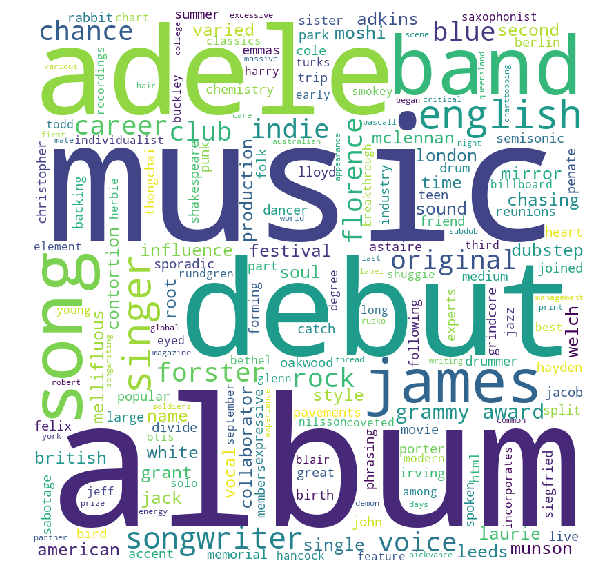

In [224]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(key_terms_combined_str) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Plot showing distribution of key words

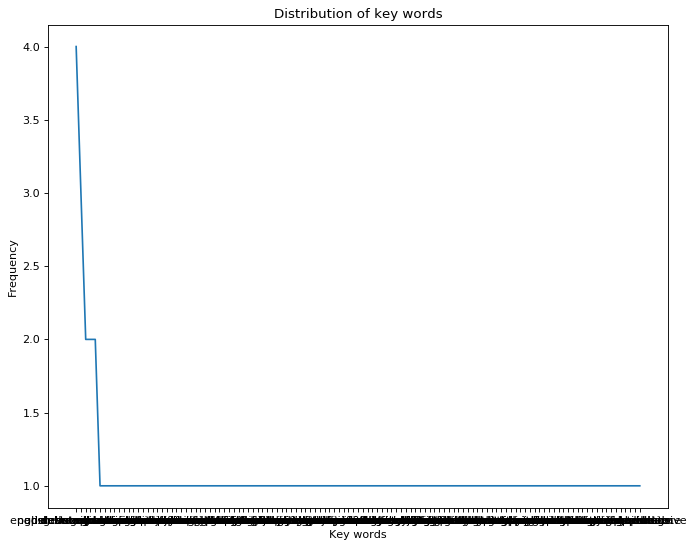

In [225]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(*zip(*sorted_kw))
plt.title('Distribution of key words')
plt.xlabel('Key words')
plt.ylabel('Frequency')
plt.show()

### =============================================================

### Section 4: Music recommendation

#### Use AWS comprehend to get entities

In [226]:
comprehend = boto3.client(service_name='comprehend', region_name='us-west-2')

In [227]:
s3 = boto3.resource('s3')
outputJSON = {}
outputJSON['Entities'] = {}
index = 0
for kw in sorted_kw_int:
    entities = json.dumps(comprehend.detect_entities(Text = kw[0], LanguageCode='en'), sort_keys=True, indent=4)
    entities = json.loads(entities)
    entityLen = len(entities['Entities'])
    for i in range(0,entityLen):
        outputJSON['Entities'][index] = {}
        outputJSON['Entities'][index]['Text'] = entities['Entities'][i]['Text']
        outputJSON['Entities'][index]['Type'] = entities['Entities'][i]['Type']
        outputJSON['Entities'][index]['Score'] = entities['Entities'][i]['Score']
        index += 1

print(outputJSON)

{'Entities': {0: {'Text': 'adele', 'Type': 'ORGANIZATION', 'Score': 0.9344174861907959}, 1: {'Text': 'james', 'Type': 'PERSON', 'Score': 0.8196612000465393}, 2: {'Text': 'english', 'Type': 'OTHER', 'Score': 0.9982802867889404}, 3: {'Text': 'florence', 'Type': 'ORGANIZATION', 'Score': 0.9830278158187866}, 4: {'Text': 'chance', 'Type': 'ORGANIZATION', 'Score': 0.9540354013442993}, 5: {'Text': 'laurie', 'Type': 'PERSON', 'Score': 0.9988375306129456}, 6: {'Text': 'adkins', 'Type': 'ORGANIZATION', 'Score': 0.992804229259491}, 7: {'Text': 'second', 'Type': 'QUANTITY', 'Score': 0.9884722232818604}, 8: {'Text': 'munson', 'Type': 'ORGANIZATION', 'Score': 0.6631314754486084}, 9: {'Text': 'single', 'Type': 'QUANTITY', 'Score': 0.7688969373703003}, 10: {'Text': 'american', 'Type': 'TITLE', 'Score': 0.8680760860443115}, 11: {'Text': 'british', 'Type': 'OTHER', 'Score': 0.9912869334220886}, 12: {'Text': 'jack', 'Type': 'PERSON', 'Score': 0.9892164468765259}, 13: {'Text': 'london', 'Type': 'ORGANIZAT

In [228]:
typeList = ['TITLE','PERSON','EVENT','ORGANIZATION']
musicEntities = []
for k1,v1 in outputJSON.items():
    for k2,v2 in v1.items():
        if(v2['Type'] in typeList):
            musicEntities.append(v2['Text'])

In [229]:
musicEntities

['adele',
 'james',
 'florence',
 'chance',
 'laurie',
 'adkins',
 'munson',
 'american',
 'jack',
 'london',
 'soul',
 'varied',
 'mellifluous',
 'grant',
 'mclennan',
 'leeds',
 'dubstep',
 'john',
 'jacob',
 'astaire',
 'trip',
 'park',
 'cole',
 'christopher',
 'lloyd',
 'hayden',
 'berlin',
 'rabbit',
 'experts',
 'felix',
 'jazz',
 'siegfried',
 'roots',
 'hancock',
 'among',
 'rundgren',
 'shuggie',
 'harry',
 'nilsson',
 'young',
 'jeff',
 'bethel',
 'glenn',
 'breakthrough',
 'robert',
 'global',
 'partner',
 'pickvance',
 'critical',
 'world',
 'rusko']

#### Music recommendation by comparing entities from Comprehend against the music KB

In [230]:
max_disp_count = 10
disp_counter = 0
str1 = 'MusicRecommendation.txt'
s3 = boto3.resource('s3')
obj = s3.Object('ag-aws-ml-sagemaker-challenge', 'AWS-ML-Challenge/data/music/Adele/AboutAdele/'+str1)
recommendMusic = []

for i in range(0,len(musicEntities)):
    for k1,v1 in artist_dict.items():
        for k2,v2 in v1.items():
            if(k1.lower() in musicEntities[i].lower() and 'singer' in k2.lower()):
                recommendMusic.append('==========================')
                recommendMusic.append('Since you listened to ' + musicEntities[i] + ', here are some suggested songs:')
                disp_counter = 0
                for k3,v3 in v2.items():
                    if(disp_counter < max_disp_count):
                        recommendMusic.append(k3 + ' - ' + v3 + '; ')
                        disp_counter += 1
            disp_counter = max_disp_count+1
            if(k2.lower() in musicEntities[i].lower() and 'singer' not in k2.lower()):
                recommendMusic.append('==========================')
                recommendMusic.append('Here are some suggested ' + musicEntities[i] + ':')
                disp_counter = 0
                for k3,v3 in v2.items():
                    if(disp_counter < max_disp_count):
                        recommendMusic.append(k3 + ' - ' + v3 + '; ')
                        disp_counter += 1
            disp_counter = max_disp_count+1
            
print(recommendMusic)
#obj.put(musicOutput)

['==========================', 'Since you listened to adele, here are some suggested songs:', 'Leona Lewis - http://www.last.fm/music/Leona+Lewis; ', 'Semisonic - http://www.last.fm/music/Semisonic; ', 'Dan Wilson - http://www.last.fm/music/Dan+Wilson; ', 'John Munson - http://www.last.fm/music/John+Munson; ', 'Jacob Slichter - http://www.last.fm/music/Jacob+Slichter; ', 'Trip Shakespeare - http://www.last.fm/music/Trip+Shakespeare; ', 'Wings - http://www.last.fm/music/Wings; ', 'Paul McCartney - http://www.last.fm/music/Paul+McCartney; ', 'Fred Astaire - http://www.last.fm/music/Fred+Astaire; ', 'Gene Kelly - http://www.last.fm/music/Gene+Kelly; ']


#### Music recommendation without using output from Comprehend

In [231]:
max_disp_count = 10
disp_counter = 0
str1 = 'MusicRecommendation.txt'
s3 = boto3.resource('s3')
obj = s3.Object('ag-aws-ml-sagemaker-challenge', 'AWS-ML-Challenge/data/music/Adele/AboutAdele/'+str1)
musicOutput = []

for i in range(0,len(sorted_kw_int)):
    for k1,v1 in artist_dict.items():
        for k2,v2 in v1.items():
            if(sorted_kw_int[i][0].lower() in k1.lower() and 'singer' in k2.lower()):
                musicOutput.append('==========================')
                musicOutput.append('Since you listened to ' + sorted_kw_int[i][0] + ', here are some suggested songs:')
                disp_counter = 0
                for k3,v3 in v2.items():
                    if(disp_counter < max_disp_count):
                        musicOutput.append(k3 + ' - ' + v3 + '; ')
                        disp_counter += 1
            disp_counter = max_disp_count+1
            if(sorted_kw_int[i][0].lower() in k2.lower() and 'singer' not in k2.lower()):
                musicOutput.append('==========================')
                musicOutput.append('Here are some suggested ' + sorted_kw_int[i][0] + ':')
                disp_counter = 0
                for k3,v3 in v2.items():
                    if(disp_counter < max_disp_count):
                        musicOutput.append(k3 + ' - ' + v3 + '; ')
                        disp_counter += 1
            disp_counter = max_disp_count+1
            
print(musicOutput)
#obj.put(musicOutput)

['==========================', 'Here are some suggested album:', '21 - http://www.last.fm/music/Adele/21; ', 'Pleasure - http://www.last.fm/music/Semisonic/Pleasure; ', 'Great Divide - http://www.last.fm/music/Semisonic/Great+Divide; ', 'Feeling Strangely Fine - http://www.last.fm/music/Semisonic/Feeling+Strangely+Fine; ', 'Lungs - http://www.last.fm/music/Florence+%252B+the+Machine/Lungs; ', 'Shadows - http://www.last.fm/music/Bird/Shadows; ', 'My Fear And Me - http://www.last.fm/music/Bird/My+Fear+And+Me; ', 'Ophelia - http://www.last.fm/music/Bird/Ophelia; ', 'Matinée - http://www.last.fm/music/Jack+Pe%C3%B1ate/Matin%C3%A9e; ', 'Believe What I Say - http://www.last.fm/music/James+Hunter/Believe+What+I+Say; ', '==========================', 'Here are some suggested music:', '21 - http://www.last.fm/music/Adele/21; ', 'Pleasure - http://www.last.fm/music/Semisonic/Pleasure; ', 'Great Divide - http://www.last.fm/music/Semisonic/Great+Divide; ', 'Feeling Strangely Fine - http://www.last.